# Using PyMC3 to fit a Linear Regression Model

Ram Narasimhan

In [6]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

This example is from **Disease Modeling with Scipy and PyMC - Dean Langsam - PyCon Israel 2019**

Let's generate some synthetic data

In [11]:
np.random.seed(7)
S = 50
x = np.linspace(2, 10, S)
y = 3*x + 4 
y += np.random.normal(scale=2, size= S)

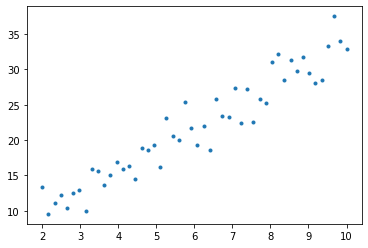

In [12]:
plt.plot(x, y, '.')

In [20]:
with pm.Model() as model:
    
    #define priors
    sigma = pm.HalfNormal('sigma', sd=10)
    m = pm.Uniform('slope', 0, 10)
    c = pm.Uniform('intercept', 0, 10)
    
    yhat = m * x + c 
    
    #define Likelihood
    likelihood = pm.Normal('y',
                           mu = yhat, sigma = sigma,
                           observed = y)
        

In [25]:
model

In [43]:
len(y) # Number of observations we have

50

# Ready to Start Sampling

We are going to sample (draw from) 10,000 times. Each attempt will get us one set of (m, x, and sigma).
If the error is "acceptable," we will randomly sample more in that neighborhood of m, x and sigam.
If the error is large, we will 'jump' elsewhere and try sampling there.
Note: the first 1000 values will be discarded. They are to warm-up the model.

In [21]:
with model:
    trace = pm.sample(10000, 
                      chains=2,
                      tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [intercept, slope, sigma]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 22000/22000 [00:24<00:00, 915.95draws/s]


### Peek inside Trace

It is perfectly okay to look under the hood.

In [32]:
len(trace)

10000

In [29]:
trace[4319]

{'sigma_log__': 0.8823941664661146,
 'slope_interval__': -0.8326169902724093,
 'intercept_interval__': -0.5230613667486478,
 'sigma': 2.4166787168435078,
 'slope': 3.0309200585710983,
 'intercept': 3.721366628438699}

So trace is a List.
It is a list of dictionaries.
It is a list of 10,000 dictionaries

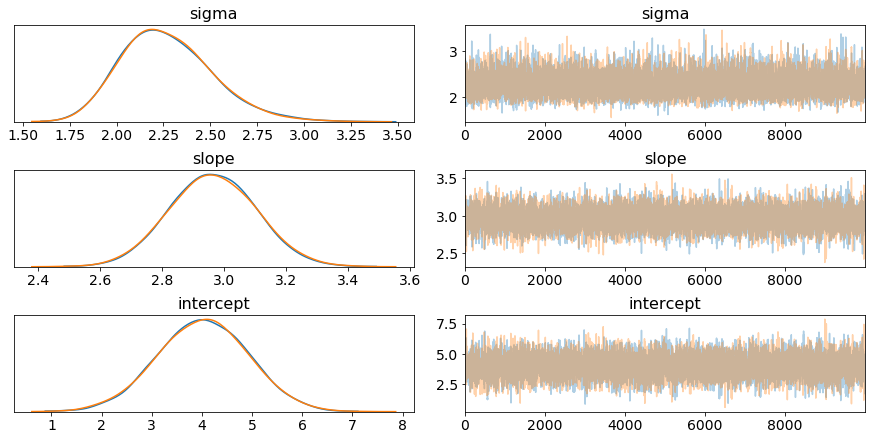

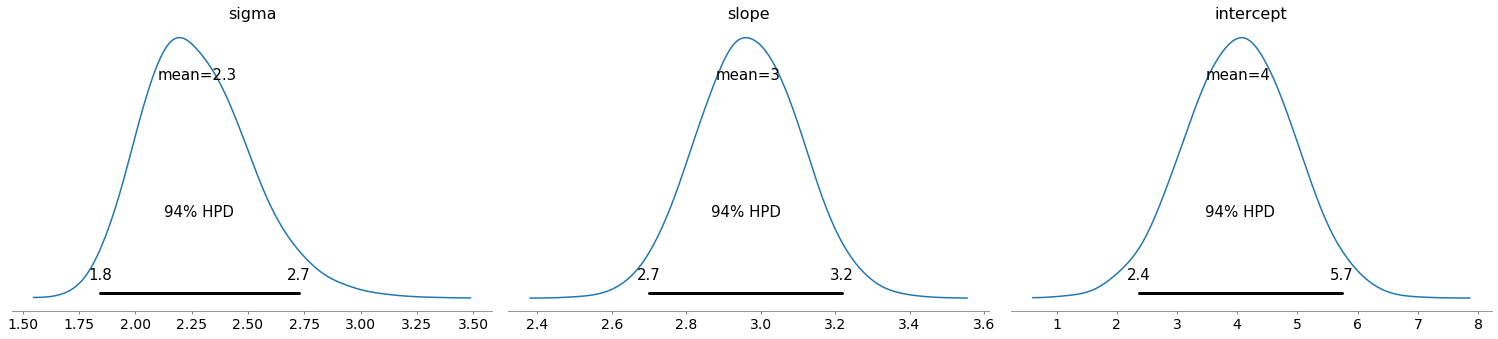

In [23]:
pm.traceplot(trace);
axes = pm.plot_posterior(trace)

(array([ 2.,  1.,  4., 14., 22., 23., 21.,  8.,  2.,  3.]),
 array([2.4244183 , 2.52277856, 2.62113882, 2.71949908, 2.81785933,
        2.91621959, 3.01457985, 3.11294011, 3.21130036, 3.30966062,
        3.40802088]),
 <a list of 10 Patch objects>)

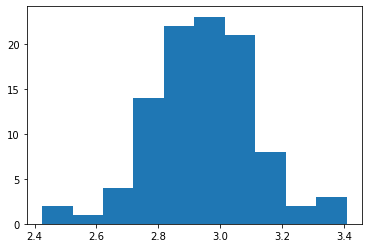

In [41]:
plt.hist([x['slope'] for x in trace[9900:]])

### Homework

TO develop some intuition about MCMC and errors and sampling, we can hand-crank it.

In [81]:
guess_m = 2.9
guess_c = 4
y_predicted = [(guess_m * x_obs + guess_c) for x_obs in x]

errors = y_predicted - y
sum(abs(errors))

86.29542051604537